# Training(1)
and write(save) the tree to pickle 

In [33]:
import pickle
from pforest.master import master
m=master(dsetname='testCS213')
m.reset()
m.train()
with open('train/out_tree1.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)


master>>init() dsetname: testCS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['train/dataset00.pic', 'train/dataset01.pic', 'train/dataset02.pic', 'train/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.0869
master>>reset() Q: 00392
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17R-
master::train() node16RG
master::train() node16L-
master::train() node15R-
master::train() node14R-
master::train() node13RG
master::train() node13L-
master::train() node12RG
master::train() node12LG
master::train() node14L-
master::train() node13R-
master::train() node12RQ
master::train() node12LG
master::train() node13LG
master::train() node15LG
master::train() node17L-
master::train() node16R-
master::train() node15R-
master::train() node14R-
master::train() node13RG
master::train() node13LQ
master::train() node14LG
master::train() node15L-
master::train() node14R-
master::train() node

# Read the tree 
The result decision tree

In [34]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('train/out_tree1.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.087e+00,Q:000392 tau:8.0 theta:[ 98.]
L- 19 H:2.249e+00,Q:000113 tau:11.0 theta:[ 196.]
L- 18 H:2.216e+00,Q:000060 tau:9.0 theta:[ 201.]
L- 17 H:1.667e+00,Q:000024 tau:6.0 theta:[ 125.]
LG 16 H:1.524e+00,Q:000017 (cl,P):(013,0.35) (012,0.24) (009,0.18)
RG 16 H:6.935e-01,Q:000007 (cl,P):(011,0.43) (009,0.43) (012,0.14)
R- 17 H:2.076e+00,Q:000036 tau:9.0 theta:[ 99.]
L- 16 H:1.450e+00,Q:000015 tau:7.0 theta:[ 196.]
LQ 15 H:1.925e-35,Q:000002 (cl,P):(013,1.00) (012,0.00) (011,0.00)
R- 15 H:1.289e+00,Q:000013 tau:11.0 theta:[ 160.]
L- 14 H:8.889e-01,Q:000009 tau:8.0 theta:[ 40.]
L- 13 H:8.444e-01,Q:000008 tau:12.0 theta:[ 178.]
L- 12 H:6.667e-01,Q:000006 tau:12.0 theta:[ 20.]
L- 11 H:5.000e-01,Q:000004 tau:9.0 theta:[ 196.]
LQ 10 H:1.925e-35,Q:000001 (cl,P):(013,1.00) (012,0.00) (011,0.00)
RQ 10 H:1.925e-35,Q:000003 (cl,P):(010,0.67) (013,0.33) (012,0.00)
RQ 11 H:1.925e-35,Q:000002 (cl,P):(011,0.50) (005,0.50) (013,0.00)
RQ 12 H:1.925e-35,Q:000002 (cl,P):(013,0.50) (011,0.50) (01

# Test Classify(1)
zeros(no register) is training data

In [35]:
import numpy as np
u=np.zeros(203)
Prob=t.classify(u)

In [36]:
Prob


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.05882353,  0.        ,  0.        ,  0.17647059,
        0.05882353,  0.11764706,  0.23529412,  0.35294118])

In [37]:
predictedGrade=np.argmax(Prob)

In [38]:
Grade=['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#']
Grade[predictedGrade]

IndexError: list index out of range

# Import file transform.xlsx

In [39]:
import pandas as pd
df_file = pd.read_excel('../src/transform.xlsx')
df_file = df_file.fillna(0)
df_file = df_file.replace(['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#'], 
                     [13, 12, 11, 10 , 9, 8, 7, 6, 5, 4, 3, 2, 1])
df_file_new = df_file.drop(['0STUDENTID','1ACADYEAR','2SEMESTER','3COURSEID','4RESULT'],1)



#### classify one column from transform.xlsx

In [40]:
df_file16 = df_file_new[16:17]
import numpy as np
u = df_file16.as_matrix()[0]
Prob=t.classify(u)

In [41]:
u

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   9.,   0.,
         8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,
         6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [42]:
u.shape

(203L,)

In [43]:
Prob

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.42857143,
        0.        ,  0.42857143,  0.14285714,  0.        ])

In [44]:
predictedGrade=np.argmax(Prob)
print predictedGrade

9


In [45]:
Grade=['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#','na']
Grade[::-1][predictedGrade]

'C'

In [46]:
df_file[16:17]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
16,316644,2553,1,CS213,9,0,0,0,0,0,...,0,0,0,8,0,12,11,0,7,0


In [47]:
df_file[123:124]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
123,321848,2553,1,CS213,10,0,0,0,0,0,...,0,0,0,8,0,0,0,0,13,0


In [48]:
df_file[415:416]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
415,329171,2554,2,CS213,11,0,0,0,0,0,...,0,0,0,10,0,0,11,0,8,0


# Read(load) tree from pickle to classify

In [49]:
with open('train/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)

In [50]:
I=data[-2];L=data[-3]

#### Check the file size

In [51]:
ls train

 Volume in drive D is DATA
 Volume Serial Number is E617-8A3A

 Directory of D:\project\forcast\src\train

04/05/2016  01:00 PM    <DIR>          .
04/05/2016  01:00 PM    <DIR>          ..
04/05/2016  12:59 PM           160,148 dataset00.pic
04/05/2016  12:59 PM           160,148 dataset01.pic
04/05/2016  12:59 PM           160,148 dataset02.pic
04/05/2016  12:59 PM           160,148 dataset03.pic
04/05/2016  12:59 PM           160,148 dataset04.pic
04/05/2016  12:55 PM            30,165 out_tree.pic
04/05/2016  01:00 PM            27,219 out_tree1.pic
04/05/2016  12:58 PM            20,359 tree213.pic
               8 File(s)        878,483 bytes
               2 Dir(s)  258,648,154,112 bytes free


In [52]:
I

array([[ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  5,  0],
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0,  5,  0]], dtype=int64)

In [53]:
I.shape

(98L, 203L)

In [54]:
L

array([12, 10, 11, 13, 13, 13, 12, 13, 12, 11, 12, 12, 13, 13, 13, 12, 13,
       11, 12, 12, 13,  5,  0, 13, 13, 13, 12, 12, 13, 13, 13, 13, 12, 13,
       12, 13, 13, 13, 11, 13, 13, 13, 12, 12, 12, 10, 12, 12, 13,  9, 11,
       13, 12, 11, 11, 11, 11, 11, 11, 13, 11, 13, 12, 11, 10, 11, 12, 11,
       11, 10, 10, 10, 11, 10, 10, 10, 11, 10, 12, 11, 11, 11, 11, 12,  8,
        5, 11, 10, 11, 11, 10, 11,  8,  0, 11,  9, 11, 11], dtype=int64)

In [55]:
L.shape

(98L,)

# Show prediction compare with actual 

In [56]:
i=0
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predictedGrade=np.argmax(Prob)
    print "actual grade:%d predicted grade:%d"%(L[i],predictedGrade)

actual grade:12 predicted grade:12
actual grade:10 predicted grade:12
actual grade:11 predicted grade:12
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:12
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:12 predicted grade:13
actual grade:11 predicted grade:13
actual grade:12 predicted grade:12
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:12
actual grade:13 predicted grade:11
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:11 predicted grade:10
actual grade:12 predicted grade:13
actual grade:12 predicted grade:12
actual grade:13 predicted grade:9
actual grade:5 predicted grade:11
actual grade:0 predicted grade:11
actual grade:13 predicted grade:12
actual grade:13 predicted grade:13
actual grade:13 predicted grade:12
actual grade:12 predicted grade:13
actual grade:12 predicted grade:13
actual grade:13 predict

In [57]:
i=0
actual1=np.array(L)
predict1=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict1[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual1[i],predict1[i])

actual grade:12 predicted grade:12
actual grade:10 predicted grade:12
actual grade:11 predicted grade:12
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:12
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:12 predicted grade:13
actual grade:11 predicted grade:13
actual grade:12 predicted grade:12
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:12
actual grade:13 predicted grade:11
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:11 predicted grade:10
actual grade:12 predicted grade:13
actual grade:12 predicted grade:12
actual grade:13 predicted grade:9
actual grade:5 predicted grade:11
actual grade:0 predicted grade:11
actual grade:13 predicted grade:12
actual grade:13 predicted grade:13
actual grade:13 predicted grade:12
actual grade:12 predicted grade:13
actual grade:12 predicted grade:13
actual grade:13 predict

# find Average 

In [58]:
np.sqrt(np.sum((actual1-predict1)**2)/len(L))

2.5071326821120348

# Plot graph 
number of correct prediction

Populating the interactive namespace from numpy and matplotlib


(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   7.,   0.,   0.,   0.,  29.,   0.,   0.,
         19.,   0.,   0.,  23.,   0.,   0.,   0.,  11.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-11. , -10.7, -10.4, -10.1,  -9.8,  -9.5,  -9.2,  -8.9,  -8.6,
         -8.3,  -8. ,  -7.7,  -7.4,  -7.1,  -6.8,  -6.5,  -6.2,  -5.9,
         -5.6,  -5.3,  -5. ,  -4.7,  -4.4,  -4.1,  -3.8,  -3.5,  -3.2,
         -2.9,  -2.6,  -2.3,  -2. ,  -1.7,  -1.4,  -1.1,  -0.8,  -0.5,
         -0.2,   0.1,   0.4,   0.7,   1. ,   1.3,   1.6,   1.9,   2.2,
          2.5,   2.8,   3.1,   3.4,   3.7,   4. ]),
 <a list of 50 Patch objects>)

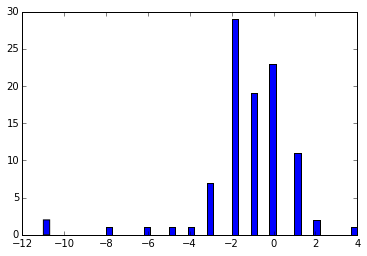

In [59]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual1-predict1,50)

# Create confusion matrix

In [60]:
predict1[0]

12.0

In [61]:
actual1[0]

12

In [62]:
n = 14
cm1 = np.zeros((n,n))
for i in xrange(len(actual1)):
    cm1[predict1[i],actual1[i]] +=1
print cm1
    

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  2.   0.   0.   0.   0.   1.   0.   0.   1.   1.   2.   2.   2.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   2.   5.   8.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   1.   1.

# Training(2)

In [64]:
import pickle
from pforest.master import master
m=master(dsetname='testCS213')
m.reset()
m.train()
with open('train/out_tree2.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)


master>>init() dsetname: testCS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['train/dataset00.pic', 'train/dataset01.pic', 'train/dataset02.pic', 'train/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.0869
master>>reset() Q: 00392
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17R-
master::train() node16RG
master::train() node16L-
master::train() node15RQ
master::train() node15L-
master::train() node14RG
master::train() node14LG
master::train() node17LG
master::train() node18L-
master::train() node17R-
master::train() node16RG
master::train() node16L-
master::train() node15R-
master::train() node14RG
master::train() node14LQ
master::train() node15L-
master::train() node14RG
master::train() node14LG
master::train() node17L-
master::train() node16R-
master::train() node15R-
master::train() node14RG
master::train() node14L-
master::train() node13RG
master::train() node

In [66]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('train/out_tree2.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test treetree213.pic
t=tree()
t.settree(root)
t.show()

*- 20 H:2.087e+00,Q:000392 tau:11.0 theta:[ 196.]
L- 19 H:2.125e+00,Q:000179 tau:9.0 theta:[ 19.]
L- 18 H:1.929e+00,Q:000021 tau:5.0 theta:[ 191.]
L- 17 H:1.679e+00,Q:000014 tau:10.0 theta:[ 160.]
LG 16 H:1.344e+00,Q:000008 (cl,P):(009,0.38) (013,0.25) (012,0.25)
R- 16 H:1.333e+00,Q:000006 tau:11.0 theta:[ 189.]
LG 15 H:5.000e-01,Q:000004 (cl,P):(009,0.50) (012,0.25) (010,0.25)
RG 15 H:1.000e+00,Q:000002 (cl,P):(012,0.50) (010,0.50) (013,0.00)
RG 17 H:6.793e-01,Q:000007 (cl,P):(011,0.57) (012,0.29) (009,0.14)
R- 18 H:2.016e+00,Q:000158 tau:3.0 theta:[ 97.]
L- 17 H:2.002e+00,Q:000122 tau:10.0 theta:[ 154.]
L- 16 H:2.031e+00,Q:000058 tau:9.0 theta:[ 98.]
L- 15 H:2.302e+00,Q:000028 tau:5.0 theta:[ 26.]
L- 14 H:2.131e+00,Q:000026 tau:8.0 theta:[ 22.]
L- 13 H:1.951e+00,Q:000010 tau:9.0 theta:[ 199.]
LG 12 H:1.373e+00,Q:000007 (cl,P):(009,0.43) (011,0.29) (012,0.14)
RG 12 H:6.667e-01,Q:000003 (cl,P):(013,0.33) (012,0.33) (011,0.33)
RG 13 H:1.832e+00,Q:000016 (cl,P):(011,0.25) (010,0.25) (013

In [67]:
with open('train/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)

In [68]:
I=data[-2];L=data[-3]

In [69]:
I

array([[ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0, 12,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       ..., 
       [ 0,  0,  0, ...,  0, 12,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0, 10,  0]], dtype=int64)

In [70]:
L

array([13, 13, 13, 13, 13, 13, 13, 12, 13, 12, 13, 12, 13, 13, 13, 13, 12,
       13, 12, 12, 13, 13, 12, 13, 13, 13, 13, 12, 12, 13, 12, 13, 10, 10,
       13, 13, 13, 13, 13, 13, 11, 10, 13, 13, 11, 13, 13, 13, 13, 13, 13,
       13, 11,  5, 12, 13,  9, 10, 10,  9, 13, 12, 13, 11, 13, 13, 13, 10,
       10, 12, 11, 13, 12, 13, 10, 12, 12, 13, 13, 13, 12, 12, 13, 13, 13,
       13, 11, 12, 13, 12, 13, 13, 13, 12, 13, 12, 13, 12], dtype=int64)

In [71]:
i=0
actual2=np.array(L)
predict2=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict2[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual2[i],predict2[i])

actual grade:13 predicted grade:11
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:9
actual grade:13 predicted grade:11
actual grade:13 predicted grade:13
actual grade:12 predicted grade:11
actual grade:13 predicted grade:13
actual grade:12 predicted grade:13
actual grade:13 predicted grade:12
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:12 predicted grade:11
actual grade:13 predicted grade:10
actual grade:12 predicted grade:11
actual grade:12 predicted grade:12
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:12 predicted grade:12
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:11
actual grade:13 predicted grade:12
actual grade:12 predicted grade:9
actual grade:12 predic

In [72]:
np.sqrt(np.sum((actual2-predict2)**2)/len(L))

1.5252968931473301

Populating the interactive namespace from numpy and matplotlib


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   8.,   0.,   0.,   5.,   0.,  13.,   0.,   0.,  55.,   0.,
          9.,   0.,   0.,   4.,   0.,   2.,   0.,   1.]),
 array([-8. , -7.6, -7.2, -6.8, -6.4, -6. , -5.6, -5.2, -4.8, -4.4, -4. ,
        -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,
         0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 30 Patch objects>)

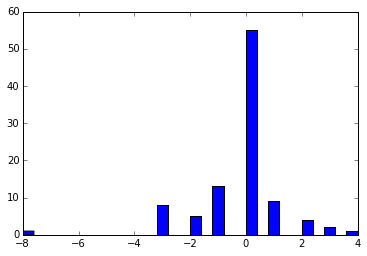

In [73]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual2-predict2,30)

In [74]:
n = 14
cm2 = np.zeros((n,n))
for i in xrange(len(actual2)):
    cm2[predict2[i],actual2[i]] +=1
print cm2

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   2.   4.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   5.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.

# Training(3)

In [75]:
import pickle
from pforest.master import master
m=master(dsetname='testCS213')
m.reset()
m.train()
with open('train/out_tree3.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)

master>>init() dsetname: testCS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['train/dataset00.pic', 'train/dataset01.pic', 'train/dataset02.pic', 'train/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.0869
master>>reset() Q: 00392
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17RG
master::train() node17LG
master::train() node18L-
master::train() node17R-
master::train() node16R-
master::train() node15R-
master::train() node14RG
master::train() node14LG
master::train() node15L-
master::train() node14R-
master::train() node13RG
master::train() node13L-
master::train() node12R-
master::train() node11RG
master::train() node11LG
master::train() node12LG
master::train() node14LG
master::train() node16LG
master::train() node17L-
master::train() node16R-
master::train() node15RG
master::train() node15L-
master::train() node14RG
master::train() node14LG
master::train() node

In [76]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('train/out_tree3.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.087e+00,Q:000392 tau:11.0 theta:[ 154.]
L- 19 H:2.136e+00,Q:000297 tau:10.0 theta:[ 196.]
L- 18 H:2.083e+00,Q:000095 tau:7.0 theta:[ 196.]
L- 17 H:1.336e+00,Q:000041 tau:9.0 theta:[ 154.]
L- 16 H:1.094e+00,Q:000008 tau:12.0 theta:[ 189.]
LG 15 H:1.126e+00,Q:000006 (cl,P):(013,0.33) (011,0.33) (012,0.17)
RQ 15 H:1.925e-35,Q:000002 (cl,P):(012,0.50) (011,0.50) (013,0.00)
R- 16 H:1.152e+00,Q:000033 tau:9.0 theta:[ 162.]
LG 15 H:1.201e+00,Q:000008 (cl,P):(013,0.38) (011,0.25) (012,0.12)
RG 15 H:8.897e-01,Q:000025 (cl,P):(013,0.64) (012,0.36) (011,0.00)
R- 17 H:2.008e+00,Q:000054 tau:10.0 theta:[ 99.]
L- 16 H:1.701e+00,Q:000031 tau:9.0 theta:[ 154.]
LG 15 H:9.793e-01,Q:000007 (cl,P):(010,0.43) (011,0.29) (013,0.14)
R- 15 H:1.673e+00,Q:000024 tau:9.0 theta:[ 22.]
L- 14 H:1.405e+00,Q:000018 tau:8.0 theta:[ 29.]
L- 13 H:1.393e+00,Q:000017 tau:8.0 theta:[ 196.]
LQ 12 H:1.925e-35,Q:000003 (cl,P):(009,0.67) (005,0.33) (013,0.00)
R- 12 H:1.340e+00,Q:000014 tau:9.0 theta:[ 99.]
L- 11 H:1.

In [77]:
with open('train/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)
I=data[-2];L=data[-3]

In [78]:
I

array([[ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0, 12,  0]], dtype=int64)

In [79]:
L

array([11, 12, 11, 11, 13, 11, 13, 13, 13, 11, 13, 13, 12, 11, 13, 11, 12,
       13, 11, 12, 13, 13, 12, 12, 11,  5, 13, 13, 11, 12, 10, 12, 12, 11,
       12, 12, 11, 12, 13, 12, 10, 10, 13, 13, 13,  5, 13, 11, 11, 10,  6,
       11, 11, 13, 12, 11, 11, 11, 12, 13, 10, 11, 13, 10, 13, 10, 12, 12,
       13, 13, 13, 13, 12, 13, 13, 13, 13, 13, 13, 13, 13, 11, 13, 13, 13,
       12, 12, 11,  5, 11,  5, 13, 13, 13, 12, 13, 13, 12], dtype=int64)

In [80]:
i=0
actual3=np.array(L)
predict3=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict3[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual3[i],predict3[i])

actual grade:11 predicted grade:13
actual grade:12 predicted grade:11
actual grade:11 predicted grade:13
actual grade:11 predicted grade:13
actual grade:13 predicted grade:13
actual grade:11 predicted grade:11
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:11
actual grade:11 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:11
actual grade:12 predicted grade:13
actual grade:11 predicted grade:13
actual grade:13 predicted grade:11
actual grade:11 predicted grade:13
actual grade:12 predicted grade:12
actual grade:13 predicted grade:12
actual grade:11 predicted grade:13
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:12 predicted grade:12
actual grade:12 predicted grade:13
actual grade:11 predicted grade:11
actual grade:5 predicted grade:9
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:11 predic

In [81]:
np.sqrt(np.sum((actual3-predict3)**2)/len(L))

1.8322507626258087

Populating the interactive namespace from numpy and matplotlib


(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   4.,   0.,
         14.,   0.,  19.,   0.,  46.,   6.,   0.,   4.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-8.        , -7.46666667, -6.93333333, -6.4       , -5.86666667,
        -5.33333333, -4.8       , -4.26666667, -3.73333333, -3.2       ,
        -2.66666667, -2.13333333, -1.6       , -1.06666667, -0.53333333,
         0.        ,  0.53333333,  1.06666667,  1.6       ,  2.13333333,
         2.66666667,  3.2       ,  3.73333333,  4.26666667,  4.8       ,
         5.33333333,  5.86666667,  6.4       ,  6.93333333,  7.46666667,  8.        ]),
 <a list of 30 Patch objects>)

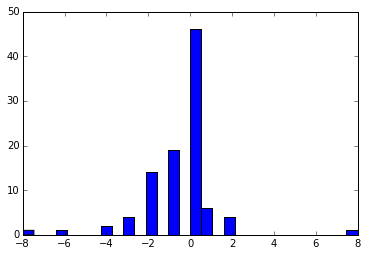

In [82]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual3-predict3,30)

In [83]:
n = 14
cm3 = np.zeros((n,n))
for i in xrange(len(actual3)):
    cm3[predict3[i],actual3[i]] +=1
print cm3

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   2.   6.   4.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   4.   5.   2.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.

# Training(4)

In [85]:
import pickle
from pforest.master import master
m=master(dsetname='testCS213')
m.reset()
m.train()
with open('train/out_tree4.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)

master>>init() dsetname: testCS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['train/dataset00.pic', 'train/dataset01.pic', 'train/dataset02.pic', 'train/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.0869
master>>reset() Q: 00392
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17R-
master::train() node16R-
master::train() node15R-
master::train() node14R-
master::train() node13RG
master::train() node13LG
master::train() node14LG
master::train() node15L-
master::train() node14R-
master::train() node13RG
master::train() node13LG
master::train() node14LG
master::train() node16L-
master::train() node15RG
master::train() node15L-
master::train() node14RG
master::train() node14LQ
master::train() node17L-
master::train() node16RG
master::train() node16L-
master::train() node15RG
master::train() node15L-
master::train() node14R-
master::train() node13RG
master::train() node

In [86]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('train/out_tree4.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.087e+00,Q:000392 tau:10.0 theta:[ 162.]
L- 19 H:2.292e+00,Q:000156 tau:10.0 theta:[ 189.]
L- 18 H:2.242e+00,Q:000049 tau:7.0 theta:[ 160.]
LG 17 H:1.443e+00,Q:000013 (cl,P):(013,0.31) (011,0.31) (012,0.15)
R- 17 H:2.141e+00,Q:000036 tau:9.0 theta:[ 189.]
LG 16 H:1.075e+00,Q:000010 (cl,P):(012,0.40) (013,0.30) (009,0.30)
R- 16 H:2.185e+00,Q:000026 tau:9.0 theta:[ 99.]
L- 15 H:1.697e+00,Q:000012 tau:10.0 theta:[ 126.]
L- 14 H:1.351e+00,Q:000010 tau:12.0 theta:[ 171.]
L- 13 H:9.387e-01,Q:000008 tau:10.0 theta:[ 160.]
L- 12 H:1.000e+00,Q:000004 tau:12.0 theta:[ 196.]
LG 11 H:6.667e-01,Q:000003 (cl,P):(013,0.67) (005,0.33) (012,0.00)
RQ 11 H:1.925e-35,Q:000001 (cl,P):(011,1.00) (013,0.00) (012,0.00)
RG 12 H:6.887e-01,Q:000004 (cl,P):(012,0.50) (013,0.25) (006,0.25)
RQ 13 H:1.925e-35,Q:000002 (cl,P):(012,0.50) (011,0.50) (013,0.00)
RG 14 H:1.000e+00,Q:000002 (cl,P):(010,0.50) (006,0.50) (013,0.00)
RG 15 H:1.944e+00,Q:000014 (cl,P):(013,0.21) (012,0.21) (009,0.21)
R- 18 H:2.081e+00,

In [87]:
with open('train/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)
I=data[-2];L=data[-3]

In [88]:
I

array([[ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0, 11,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       ..., 
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0,  8,  0]], dtype=int64)

In [89]:
L

array([12, 10, 10, 11, 12,  9, 10, 11, 12,  9, 13, 11, 13, 13, 10, 13, 10,
        9, 12, 11, 10,  9,  6, 10, 10, 10, 12, 12,  9, 11, 11, 13, 12, 10,
       13, 13, 11, 13, 13, 13, 10, 13, 13, 12, 13, 11, 12, 13, 11, 12, 13,
       10, 12, 13, 13, 10, 13, 13, 11, 13, 10, 12, 11, 13, 13, 11, 13, 13,
        5, 13, 11, 13, 11, 12, 12, 12, 13, 11, 11, 12, 11, 13, 11, 12, 12,
       12, 11, 13, 11, 11, 11, 12, 13, 13, 13, 13, 13, 11], dtype=int64)

In [90]:
i=0
actual4=np.array(L)
predict4=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict4[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual4[i],predict4[i])

actual grade:12 predicted grade:13
actual grade:10 predicted grade:11
actual grade:10 predicted grade:10
actual grade:11 predicted grade:13
actual grade:12 predicted grade:11
actual grade:9 predicted grade:11
actual grade:10 predicted grade:10
actual grade:11 predicted grade:11
actual grade:12 predicted grade:12
actual grade:9 predicted grade:11
actual grade:13 predicted grade:13
actual grade:11 predicted grade:10
actual grade:13 predicted grade:12
actual grade:13 predicted grade:12
actual grade:10 predicted grade:10
actual grade:13 predicted grade:13
actual grade:10 predicted grade:10
actual grade:9 predicted grade:11
actual grade:12 predicted grade:13
actual grade:11 predicted grade:11
actual grade:10 predicted grade:12
actual grade:9 predicted grade:9
actual grade:6 predicted grade:6
actual grade:10 predicted grade:6
actual grade:10 predicted grade:13
actual grade:10 predicted grade:13
actual grade:12 predicted grade:12
actual grade:12 predicted grade:13
actual grade:9 predicted gra

In [91]:
np.sqrt(np.sum((actual4-predict4)**2)/len(L))

1.5875793407780621

Populating the interactive namespace from numpy and matplotlib


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,
          0.,   0.,   0.,  16.,   0.,   0.,   0.,  13.,   0.,   0.,   0.,
         45.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([-8.  , -7.76, -7.52, -7.28, -7.04, -6.8 , -6.56, -6.32, -6.08,
        -5.84, -5.6 , -5.36, -5.12, -4.88, -4.64, -4.4 , -4.16, -3.92,
        -3.68, -3.44, -3.2 , -2.96, -2.72, -2.48, -2.24, -2.  , -1.76,
        -1.52, -1.28, -1.04, -0.8 , -0.56, -0.32, -0.08,  0.16,  0.4 ,
         0.64,  0.88,  1.12,  1.36,  1.6 ,  1.84,  2.08,  2.32,  2.56,
         2.8 ,  3.04,  3.28,  3.52,  3.76,  4.  ]),
 <a list of 50 Patch objects>)

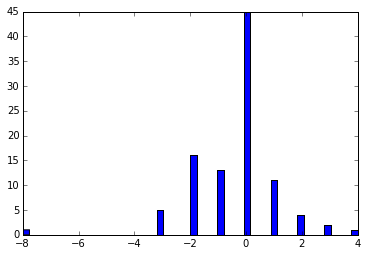

In [92]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual4-predict4,50)

In [93]:
n = 14
cm4 = np.zeros((n,n))
for i in xrange(len(actual4)):
    cm4[predict4[i],actual4[i]] +=1
print cm4

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   3.   0.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   1.   8.   5.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   2.   5.   3.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.

# Traing(5)

In [94]:
import pickle
from pforest.master import master
m=master(dsetname='testCS213')
m.reset()
m.train()
with open('train/out_tree5.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)

master>>init() dsetname: testCS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['train/dataset00.pic', 'train/dataset01.pic', 'train/dataset02.pic', 'train/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.0869
master>>reset() Q: 00392
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17RG
master::train() node17L-
master::train() node16R-
master::train() node15RG
master::train() node15LQ
master::train() node16L-
master::train() node15RG
master::train() node15L-
master::train() node14R-
master::train() node13RG
master::train() node13L-
master::train() node12R-
master::train() node11RG
master::train() node11LG
master::train() node12LQ
master::train() node14LG
master::train() node18L-
master::train() node17R-
master::train() node16RG
master::train() node16L-
master::train() node15RQ
master::train() node15LG
master::train() node17L-
master::train() node16R-
master::train() node

In [95]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('train/out_tree5.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.087e+00,Q:000392 tau:12.0 theta:[ 196.]
L- 19 H:2.171e+00,Q:000266 tau:10.0 theta:[ 196.]
L- 18 H:2.098e+00,Q:000119 tau:9.0 theta:[ 201.]
L- 17 H:1.630e+00,Q:000038 tau:8.0 theta:[ 22.]
LG 16 H:1.493e+00,Q:000014 (cl,P):(009,0.36) (013,0.14) (012,0.14)
R- 16 H:1.307e+00,Q:000024 tau:10.0 theta:[ 189.]
LG 15 H:4.000e-01,Q:000005 (cl,P):(013,0.40) (009,0.40) (011,0.20)
R- 15 H:1.351e+00,Q:000019 tau:9.0 theta:[ 162.]
LQ 14 H:1.925e-35,Q:000003 (cl,P):(013,0.33) (011,0.33) (009,0.33)
R- 14 H:1.408e+00,Q:000016 tau:7.0 theta:[ 125.]
LG 13 H:9.510e-01,Q:000005 (cl,P):(013,0.40) (011,0.40) (012,0.20)
RG 13 H:1.455e+00,Q:000011 (cl,P):(013,0.45) (011,0.27) (012,0.18)
R- 17 H:2.041e+00,Q:000081 tau:9.0 theta:[ 125.]
L- 16 H:2.043e+00,Q:000051 tau:7.0 theta:[ 22.]
LG 15 H:4.000e-01,Q:000005 (cl,P):(012,0.40) (005,0.40) (011,0.20)
R- 15 H:2.003e+00,Q:000046 tau:10.0 theta:[ 19.]
L- 14 H:1.393e+00,Q:000017 tau:10.0 theta:[ 160.]
LG 13 H:1.160e+00,Q:000011 (cl,P):(013,0.45) (012,0.18) (

In [96]:
with open('train/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)
I=data[-2];L=data[-3]

In [97]:
I

array([[ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       ..., 
       [ 0,  0,  0, ...,  0, 11,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  7,  0]], dtype=int64)

In [98]:
L

array([11, 12, 13, 11, 12, 11,  9, 11, 13, 12, 10, 10, 11,  5, 13, 13, 12,
       11, 12, 10, 12, 12, 13, 11, 13, 11, 11, 10, 13,  9, 11,  9, 12,  9,
        9, 12, 11, 13, 12, 13, 12, 11, 11, 11, 12, 11, 13, 11, 11, 13,  5,
        9, 11, 12, 11, 12, 12, 11,  5, 13,  9, 10, 11, 12, 13,  5, 10, 12,
       13, 13, 13, 13, 11, 10, 12, 13, 12, 13, 12,  5, 13, 13, 13, 11,  9,
       11, 11,  9, 13, 12,  9, 11, 12,  6, 11, 13,  9, 12], dtype=int64)

In [99]:
i=0
actual5=np.array(L)
predict5=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict5[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual5[i],predict5[i])

actual grade:11 predicted grade:9
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:11 predicted grade:13
actual grade:12 predicted grade:12
actual grade:11 predicted grade:12
actual grade:9 predicted grade:13
actual grade:11 predicted grade:11
actual grade:13 predicted grade:13
actual grade:12 predicted grade:10
actual grade:10 predicted grade:13
actual grade:10 predicted grade:10
actual grade:11 predicted grade:13
actual grade:5 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:12 predicted grade:11
actual grade:11 predicted grade:13
actual grade:12 predicted grade:13
actual grade:10 predicted grade:13
actual grade:12 predicted grade:10
actual grade:12 predicted grade:13
actual grade:13 predicted grade:13
actual grade:11 predicted grade:11
actual grade:13 predicted grade:13
actual grade:11 predicted grade:11
actual grade:11 predicted grade:13
actual grade:10 predicted grade:10
actual grade:13 predict

In [100]:
np.sqrt(np.sum((actual5-predict5)**2)/len(L))

2.4327694808466287

Populating the interactive namespace from numpy and matplotlib


(array([  4.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   3.,   0.,   0.,   4.,   0.,   0.,   0.,  16.,   0.,
          0.,  13.,   0.,   0.,  44.,   0.,   0.,   0.,   3.,   0.,   0.,
          7.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-8. , -7.7, -7.4, -7.1, -6.8, -6.5, -6.2, -5.9, -5.6, -5.3, -5. ,
        -4.7, -4.4, -4.1, -3.8, -3.5, -3.2, -2.9, -2.6, -2.3, -2. , -1.7,
        -1.4, -1.1, -0.8, -0.5, -0.2,  0.1,  0.4,  0.7,  1. ,  1.3,  1.6,
         1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,  4.3,  4.6,  4.9,
         5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ]),
 <a list of 50 Patch objects>)

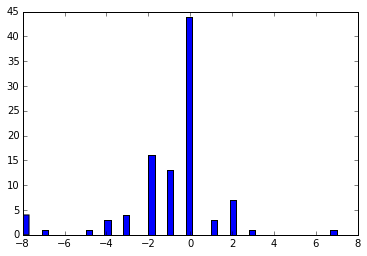

In [101]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual5-predict5,50)

In [102]:
n = 14
cm5 = np.zeros((n,n))
for i in xrange(len(actual5)):
    cm5[predict5[i],actual5[i]] +=1
print cm5

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   0.   3.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   0.   3.   1.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   3.   1.  10.   3.   1.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   1.   2.   6.   0.]
 [  0.   0.   0.   0.   0.   4.   0.   0.   0.   3.

In [103]:
predict5[0]

9.0

In [104]:
actual5[0]

11

In [105]:
predict5[i] == actual5[i]


False

# Find Precision

In [106]:
actual1

array([12, 10, 11, 13, 13, 13, 12, 13, 12, 11, 12, 12, 13, 13, 13, 12, 13,
       11, 12, 12, 13,  5,  0, 13, 13, 13, 12, 12, 13, 13, 13, 13, 12, 13,
       12, 13, 13, 13, 11, 13, 13, 13, 12, 12, 12, 10, 12, 12, 13,  9, 11,
       13, 12, 11, 11, 11, 11, 11, 11, 13, 11, 13, 12, 11, 10, 11, 12, 11,
       11, 10, 10, 10, 11, 10, 10, 10, 11, 10, 12, 11, 11, 11, 11, 12,  8,
        5, 11, 10, 11, 11, 10, 11,  8,  0, 11,  9, 11, 11], dtype=int64)

In [107]:
print cm1

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  2.   0.   0.   0.   0.   1.   0.   0.   1.   1.   2.   2.   2.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   2.   5.   8.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   1.   1.

In [108]:
print cm2

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   2.   4.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   5.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.

In [109]:
print cm3

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   2.   6.   4.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   4.   5.   2.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.

In [110]:
print cm4

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   3.   0.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   1.   8.   5.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   2.   5.   3.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   0.

In [111]:
print cm5

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   0.   3.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   0.   3.   1.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   3.   1.  10.   3.   1.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   1.   2.   6.   0.]
 [  0.   0.   0.   0.   0.   4.   0.   0.   0.   3.

In [112]:
cm = cm1+cm2+cm3+cm4+cm5

In [113]:
print cm

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     1.    1.]
 [   0.    0.    0.    0.    0.    0.    2.    0.    0.    0.    1.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    2.    0.    0.    0.    6.    0.    3.
     1.    2.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    7.    4.
     3.    4.]
 [   2.    0.    0.  

In [114]:
cm[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [115]:
cm[13]

array([   0.,    0.,    0.,    0.,    0.,    8.,    0.,    0.,    1.,
          4.,   26.,   63.,   61.,  144.])

In [116]:
cm[8,9]

0.0

In [117]:
cm[10,9]

0.0

In [118]:
cm[9,8]

0.0

In [119]:
cm.sum()

490.0

# Find Precision

In [121]:
#find TP
from collections import defaultdict
tp = defaultdict(list)
fp = defaultdict(list)
for i in range(0,14):
    for j in range(0,14):
        if i == j: 
            tp[i] = cm[i,j]
            TP = tp[i]+tp[i-1]+tp[i-2]+tp[i-3]+tp[i-4]+tp[i-5]+tp[i-6]+tp[i-7]+tp[i-8]+tp[i-9]+tp[i-10]+tp[i-11]+tp[i-12]+tp[i-13]
        
            
print "TP is %f"%(TP)
print "--------------------------------------------"
sum = cm.sum()
FP = sum-TP
print "FP is %f"%(FP)

precision = TP/FP
print "precision is %f"%(precision)

TP is 213.000000
--------------------------------------------
FP is 277.000000
precision is 0.768953


In [124]:
cm.sum()

490.0